In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./archive/new_train.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
df.shape

(32950, 16)

### Handle Missing Values

In [5]:
unknown_columns = []
for i in range(len(df.columns)):
    count = df[df[df.columns[i]] == 'unknown'].shape[0]
    if count > 0:
        unknown_columns.append(df.columns[i])
        print(df.columns[i], count, (count/df.shape[0])*100, '%')

job 265 0.8042488619119879 %
marital 65 0.19726858877086492 %
education 1397 4.239757207890744 %
default 6940 21.062215477996965 %
housing 796 2.415781487101669 %
loan 796 2.415781487101669 %


In [6]:
print("Column With Numerical Values")
num_columns = list(df._get_numeric_data().columns) 
num_columns

Column With Numerical Values


['age', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
print("Column With Categorical Values")
cat_columns = []
for i in range(len(df.columns)):
    if df.columns[i] not in num_columns:
        cat_columns.append(df.columns[i])
cat_columns

Column With Categorical Values


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [8]:
# sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='Count'>

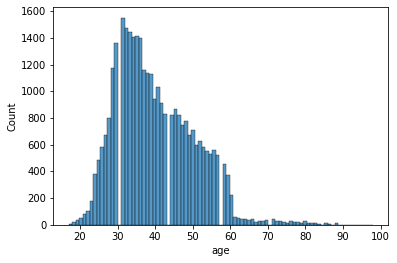

In [9]:
sns.histplot(data=df,x="age")

<AxesSubplot:xlabel='duration', ylabel='Count'>

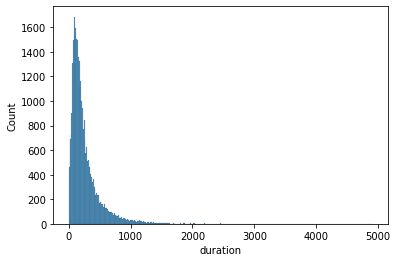

In [10]:
sns.histplot(data=df,x="duration")

<AxesSubplot:xlabel='campaign', ylabel='Count'>

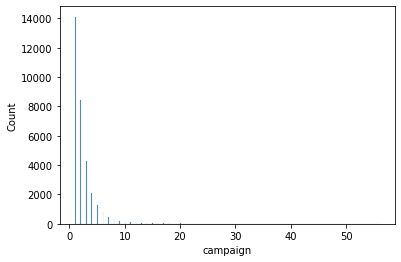

In [11]:
sns.histplot(data=df,x="campaign")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

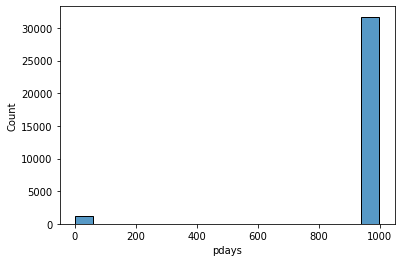

In [12]:
sns.histplot(data=df,x="pdays")

<AxesSubplot:xlabel='previous', ylabel='Count'>

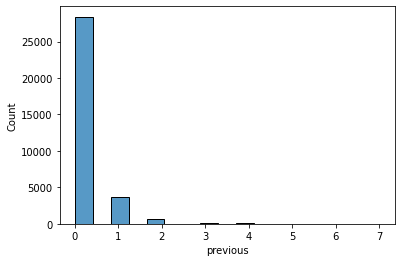

In [13]:
sns.histplot(data=df,x="previous")

In [14]:
## replaced all unknown values with mode.

for colName in unknown_columns:
    df[colName].mask(df[colName] == 'unknown', df[colName].mode().values[0], inplace=True)

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [16]:
for i in range(len(df.columns)):
    count = df[df[df.columns[i]] == 'unknown'].shape[0]
    if count > 0:
        print(df.columns[i], count, (count/df.shape[0])*100, '%')

In [18]:
df.to_csv('dataset.csv', index=False)